In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

Возьмем значения $a$ = [2,7,5] 

$m = 200$

$sigma = 0.2$ 


In [25]:
m = 200 
T = np.arange(0,(m-1)*10/m+1e-2,10/m)
a_true = np.array([2,7,5])
print('len T = ' + str(len(T)))

len T = 200


In [29]:
def build(a,sigma):
    y_true = a[2]*np.sin(T) + a[1]*T + a[0]
    y_obs = y_true + sps.norm.rvs(size=len(y_true),loc=0,scale=sigma)
    delta_i = y_obs - y_true
    return y_true,y_obs,delta_i


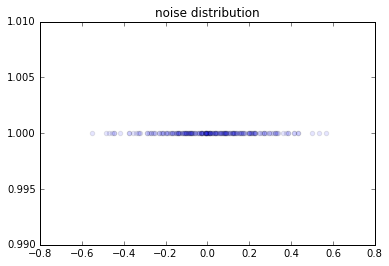

In [31]:
sigma = 0.2
y_true,y_obs,delta_i = build(a_true,sigma)
plt.title('noise distribution')
plt.scatter(delta_i, np.ones(len(y_true)) ,  alpha=0.1)

## 1) МНК
$y = a_2 \sin(t) + a_1 t + a_0$, нужно найти $a$, минимизировав $\left|Ax - y \right|_2$
$$a = [a_0,a_1,a_2], \quad y = [y^{true}_1,y^{true}_2,\dots,y^{true}_m], \quad A = \left( \begin{matrix} 1 & t_1 & sin t_1 \\ 1 & t_2 & sin t_2\\ \dots \\ 1 & t_m & sin t_m \end{matrix}\right)$$

Решением будет являться $a = Zb$ , где $Z = (A^T A)^{-1}A^T$

In [44]:
def OLS(y,T) :
    A = np.matrix([[1,t,np.sin(t)] for t in T])
    a = (A.T*A).I * A.T * np.matrix(y).T
    return np.array(a.T)[0]

In [43]:
a = OLS(y_obs,T)
a

array([ 2.01021138,  6.99990707,  5.01942732])

## 2) 
